# DSCI235 Final Project - Sam Herold

https://github.com/SamHero16/DSCI235Final

### Introduction
I have a huge interest in data science for health and biological sciences. In this project I wanted to explore mental health in the world of tech. The data I found for this is from a survey taken in 2014. It asked employees questions about their demographics, the company they work for, and their relationship with mental health. In particular I was interested in the 'treatment' column. This indicated if a surveyee has sought treatment or mental health. This is what I am interested in and is a good portion of this project.

In [3]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

### Data exploration and cleaning

I could tell right off the bat that this data was going to be a little strange. Whenever there is a survey and people can give custom answers, things can get tricky. An important thing to look at is the unique values in each column. This can be very revealing of what is going on in the column. I like to do this whenever I do wrangling.

In [4]:
data = pd.read_csv('survey.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
for i in data.columns[:-1]:  
    print(i, " : " , data[i].unique())

Timestamp  :  ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age  :  [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender  :  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-

## Exploring Gender in Tech
The first thing I noticed about this dataset was the amount of different responses for gender. I wanted to collect people who wrote down male (or something similar to male), female (or something similar to male), or other (something related to neither).

In [6]:
data.loc[data['Gender'].isin(["Female", "F", "female", "f", "Woman", "woman"]), 'Gender'] = "Female"
data.loc[data['Gender'].isin(["Male", "M", "male", "m", "Man", "man"]), 'Gender'] = "Male"
data.loc[False == data['Gender'].isin(["Female", "F" , "female", "f", "Male", "M" , "male", "m"]), "Gender"] = "Other"
#Set standard gender variables

In [7]:
print("Male responses: " , sum(data['Gender'].isin(["Male", "M" , "male", "m", "Man" , "man"])))
print("Female responses: " , sum(data['Gender'].isin(["Female", "F" , "female", "f", "Woman" , "woman"])))
print("Other responses: " , sum(False == data['Gender'].isin(["Female", "F" , "female", "f", "Male", "M" , "male", "m"])))

Male responses:  973
Female responses:  240
Other responses:  46


First thing I notice is the gender imbalance. There are signigicantly more male employees than female in this survey and in tech in general. Also there is a non significant amount of non-binary people. Some people also joked around in this response. This seems to be one of the only questions that you could write a custom response in. 

In [8]:
percMen= sum((data["tech_company"] == "Yes") & (data["Gender"] == "Male")) / sum((data["tech_company"] == "Yes"))
print(100*round(percMen , 3) , "% of the people surveyed who work at tech companies are men.")

78.5 % of the people surveyed who work at tech companies are men.


Again, this shows the gender imbalance in tech companies

Next, I want to examine how this gender imbalance operates by country. Some countries had very few responses, so I only looked at those with a significant amount of responses

In [9]:
c_g_group = data.groupby('Country')['Gender'].value_counts()
countryPercFeMale = (c_g_group.loc[:, 'Female'] / (c_g_group.loc[:, 'Male'] + c_g_group.loc[:, 'Female'])).sort_values(ascending = False)

In [10]:
top = data.groupby('Country').size().sort_values(ascending = False)[:5]
countryPercFeMale = countryPercFeMale[countryPercFeMale.index.isin(top.index)]

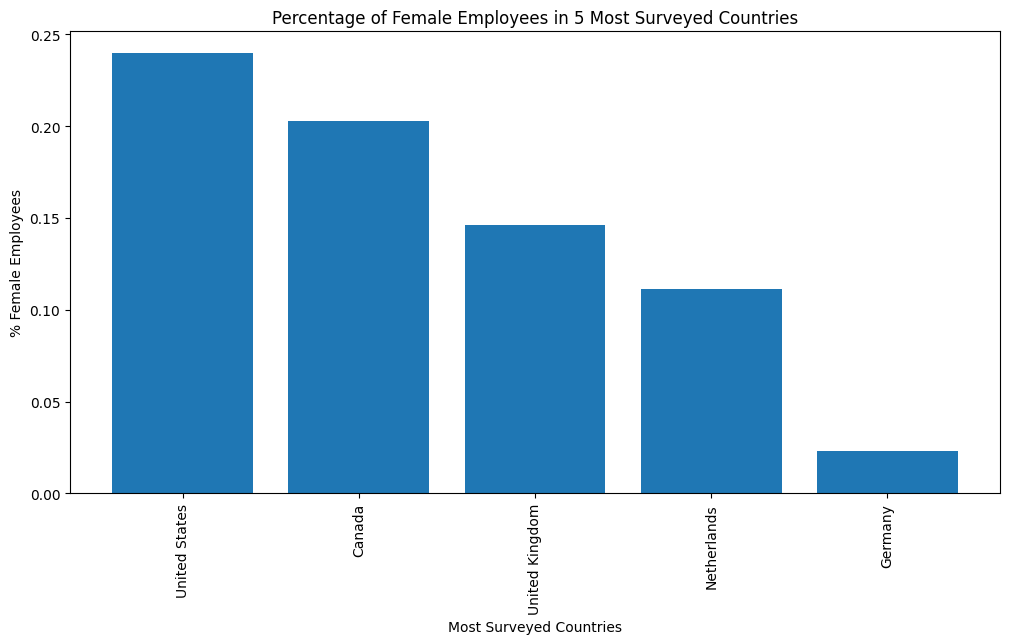

In [11]:
counts = countryPercFeMale.value_counts()
plt.figure(figsize=(12, 6))
plt.bar(countryPercFeMale.index, countryPercFeMale)
plt.xticks(rotation=90);
plt.xlabel('Most Surveyed Countries')
plt.ylabel('% Female Employees')
plt.title('Percentage of Female Employees in 5 Most Surveyed Countries');

The united states have the highest percentage of female employees (that took the survey). 

## Exploring Mental Health ('Treatment' column) by demographics
The next thing that I wanted to examine was how mental health varies by demographics.

In [12]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

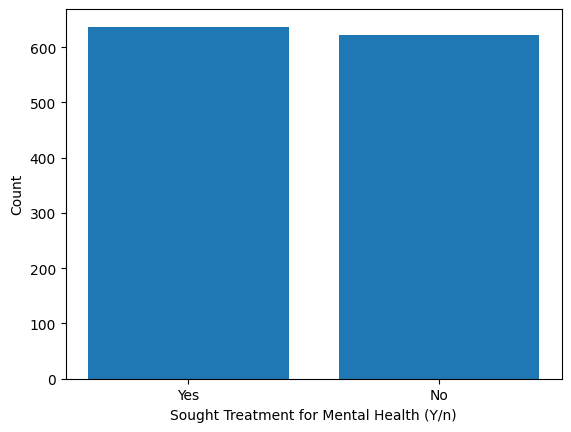

In [13]:
plt.bar(data['treatment'].value_counts().index, data['treatment'].value_counts());
plt.xlabel('Sought Treatment for Mental Health (Y/n)')
plt.ylabel('Count');

Around a 50-50 split of surveyed people have and haven't sought treatment for mental health. There are more people who have sought help than I thought that there would be.

I want to see if women, men or other seek help more often. 

<Axes: ylabel='Gender'>

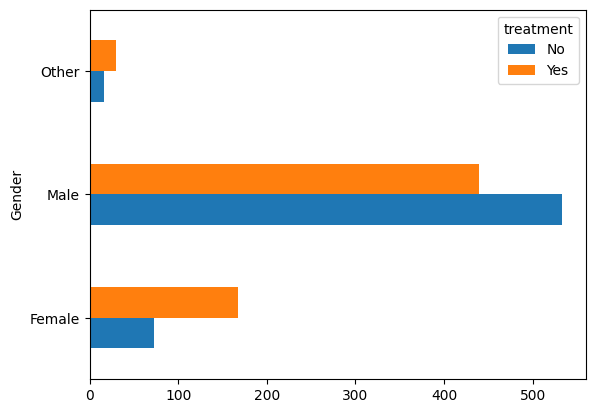

In [14]:
data.groupby('Gender')['treatment'].value_counts(sort=False).unstack().plot(kind = "barh")

We see that men seek treatment less overall than the other two groups. Twice as many women seek help than those who dont. Below are the value counts for this.

In [20]:
data.groupby('Gender')['treatment'].value_counts(sort=False)

Gender  treatment
Female  No            73
        Yes          167
Male    No           533
        Yes          440
Other   No            16
        Yes           30
Name: treatment, dtype: int64

Next I wanted to look at age and how it relates to people getting treatment for mental health. First some housekeeping and summary stats.

In [46]:
data = data[(data["Age"] < 100) & (data["Age"] > 18)] 
#There were some trolls who put gender as negativen numebrs and very large numbers

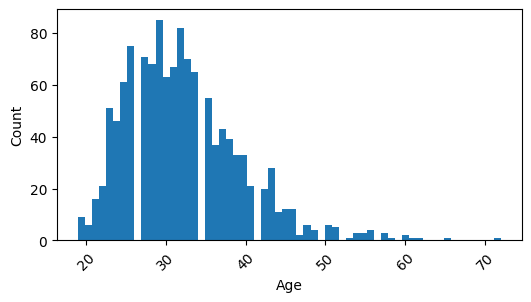

In [52]:
plt.figure(figsize=(6, 3))
plt.hist(data['Age'], bins = 60)
plt.xticks(rotation=45) ;
plt.xlabel("Age");
plt.ylabel("Count")
plt.show()

In [24]:
print("Mean Age of Participant: " , round(data['Age'].mean()))

Mean Age of Participant:  32


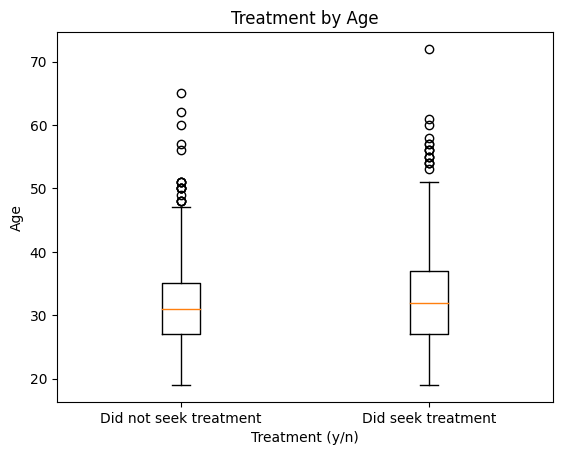

In [54]:
plt.boxplot([data['Age'][data['treatment'] == "No"] , data['Age'][data['treatment'] == "Yes"]], labels=["Did not seek treatment" , "Did seek treatment"]);
plt.xlabel("Treatment (y/n)");
plt.ylabel("Age")
plt.title("Treatment by Age")
plt.show()

It doesnt look like there is much difference in treatment depending on age. 

### Company Attitudes 
Now I will look at how different companies influence people to seek treatment. This section will look at how different company policies and demographics relate to the treatment column.

First, size of company:

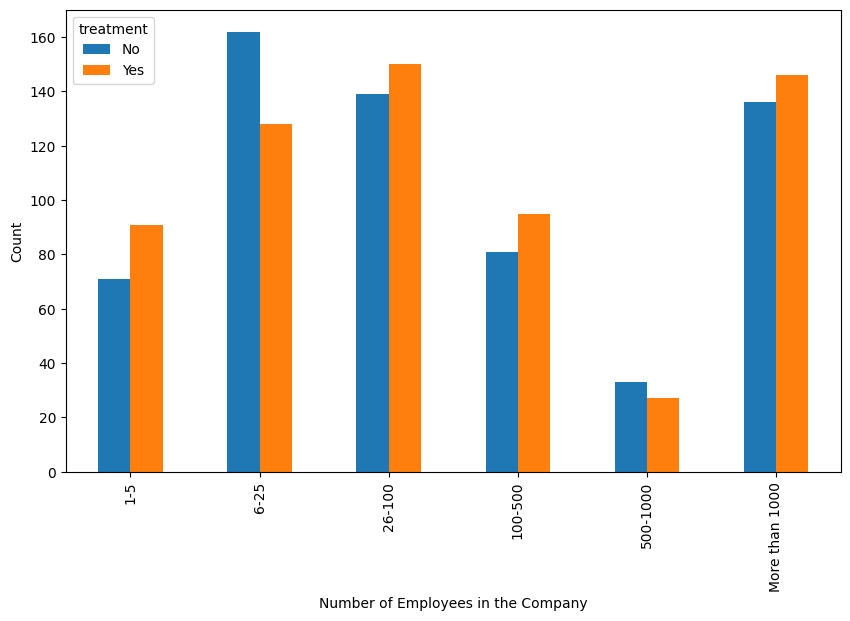

In [18]:
counts = data.groupby(['no_employees', 'treatment']).size().unstack()
counts = counts.loc[["1-5" , "6-25" , "26-100" , "100-500" , "500-1000" , "More than 1000"]]
counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Number of Employees in the Company")
plt.ylabel("Count")
plt.show()

It does not look like size of company has much to do with seeking treatment. This plot is also helpful because it shows how many observations are from each size company.

Going foward, this style of plot is going to be very helpful, because the rest of the features are categorial.

Next I will investigate companies attitudes toward mental health and the resources they provide,

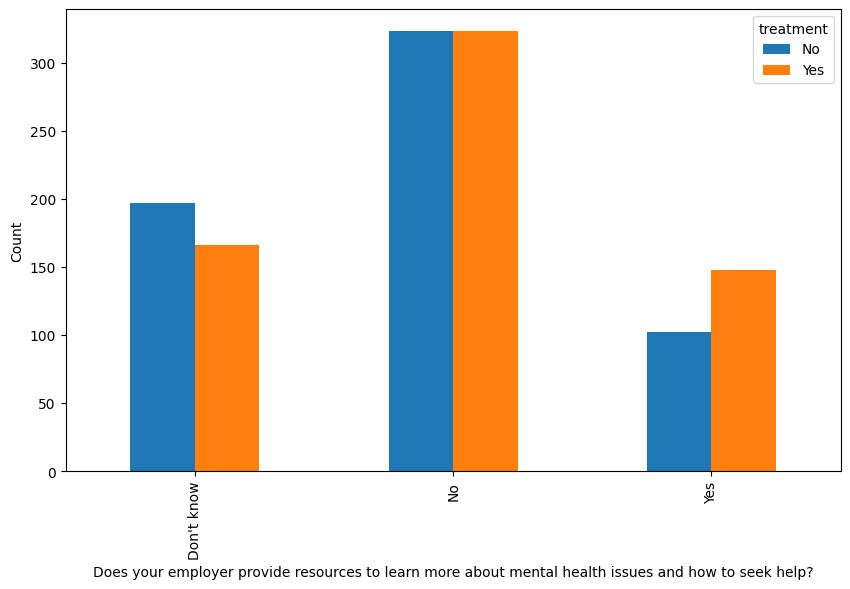

In [19]:
counts = data.groupby(['seek_help', 'treatment']).size().unstack()
counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Does your employer provide resources to learn more about mental health issues and how to seek help?")
plt.ylabel("Count")
plt.show()

This makes sense. If you dont know if an employer provides resources they probably either dont or arent doing a good job, meaning less people will seek help. If they do provide resources. People are more likely to seek treatment.

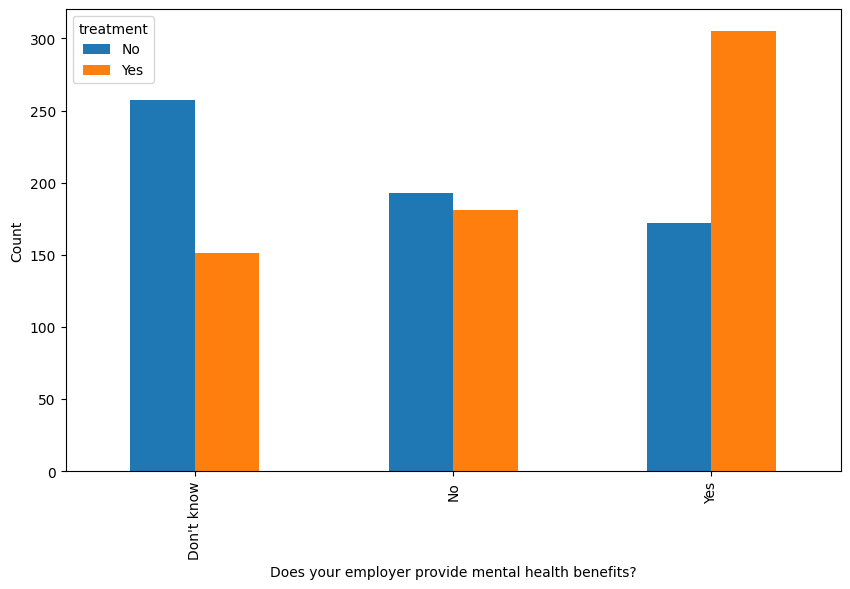

In [20]:
counts = data.groupby(['benefits', 'treatment']).size().unstack()
counts.plot(kind='bar',  figsize=(10, 6))
plt.xlabel("Does your employer provide mental health benefits?")
plt.ylabel("Count")
plt.show()

This makes sense: If an employer provides mental health benefits people are more likely to seek treatment.

### Employee Attitudes
There are many columns asking how employees feel about mental health (ie. Would you be willing to discuss a mental health issue with your coworkers?) I explore the most interesting ones.

First Would you be willing to discuss a mental health issue with your coworkers?	

In [158]:
cwrkrs = data.groupby(['coworkers','treatment']).size().unstack()
perc = pd.DataFrame(round(100 * cwrkrs['Yes']/(cwrkrs['No'] + cwrkrs['Yes']),4).astype(str) + "%", columns = ["Percentage who sought treatment"])
perc.rename_axis('Would you be willing to discuss a mental health issue with your coworkers?')

,Percentage who sought treatment
Would you be willing to discuss a mental health issue with your coworkers?,
No,45.4902%
Some of them,50.3906%
Yes,57.0136%


This was pretty cool to uncover. It makes sense that people who are more open with talking about mental health are more likely to go seek treatment. 

In [162]:
cwrkrs = data.groupby(['mental_health_interview','treatment']).size().unstack()
perc = pd.DataFrame(round(100 * cwrkrs['Yes']/(cwrkrs['No'] + cwrkrs['Yes']),4).astype(str) + "%", columns = ["Percentage who sought treatment"])
perc.rename_axis('Would you bring up a mental health issue with a potential employer in an interview?')

,Percentage who sought treatment
Would you bring up a mental health issue with a potential employer in an interview?,
Maybe,39.3204%
No,52.6052%
Yes,57.5%


### Comments
I am going to try to use regualr expressions to get some insight into what people are saying in the comments section


In [238]:
import re
data["comments"].unique()[0:5]

array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later'], dtype=object)

This is rather trivial, but I wanted to measure how 'positive' the comments were versus 'negative.' I did this by passing over the comments to get an idea how they were written, then counting occurances of as many positive and negative words that I could think of.

In [211]:
fulltext = " ".join(data["comments"].unique()[1:])

In [237]:
regexp=r"(positive | joy | good | great | comfortable | safe | happy | excellent | satisfied | wonderful | pleasant)"
print("Positive words in comments:" , len(re.findall(regexp, fulltext)))

Positive words in comments: 21


In [236]:
regexp=r"(negative | fear | problem |  bad | not good| issue | hate|  uncomfortable | unsafe | unpleasant | unhappy | unsatisfied | sad)"
print("Negative words in comments:" ,len(re.findall(regexp, fulltext)))

Negative words in comments: 35


I want to investigate the use of the word 'drug' in the comments. I was curious what people were saying about drugs:

In [231]:
regexp=r"(drug)"
for i in data["comments"].unique()[1:]:
    sentence = re.search(regexp, i)
    if sentence is not None: 
        print(i)
        print("****************************")

Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better
****************************
Family history of depression.  Currently dealing with depression and anxiety as well as drug addition.Employer provides & pays premiums on insurance which covers therapy and prescriptions.  Employer allows work-from-home and unlimited PTO which makes episodes easier to control.I don't speak of my problems to anyone at work except for the people that I consider friends and even then I don't go into great detail.I would never bring up a mental health issue during an interview for fear of discrimination and rejection (and therefore greater depression).  One co-worker had serious anxiety problems and would not inform his team of episodes and was eventually let go for being unresponsive.
****************************
This issue for me is very real at the moment. I have missed several days of work recently because of a bad reaction to a depression/anxiety drug and I hate

These are really personal and emotional.

This one really stuck out to me: 

"I have missed several days of work recently because of a bad reaction to a depression/anxiety drug and I hate not being able to discuss it with my boss without worrying that I will be labeled a liability. " 

This tells me that mental health is still a strained subject in the work place, and a lot of people could benefit from it being less taboo and more talked about. 

### Conclusion
It seems like the overall opinion on mental health is mixed. More people than you may think seek help for mental health, talk to others about mental health, and are open about their mental health. This is vergy good too see and hopefully we are moving to a world were mental health resources and conversations are ubiquitous.

There is still work to be done. Men do not seek help nearly as much as other groups. Alot of companies are not that good with employee mental health. This was in 2014 though - I am curious what a survery would look like now. I bet there are even more resources now, as mental health is no longer tabboo and is known to be very important.